In [8]:
pip install pycaret

     |████████████████████████████████| 318 kB 8.3 MB/s 
     |████████████████████████████████| 167 kB 38.9 MB/s 
     |████████████████████████████████| 16.5 MB 140 kB/s 
     |████████████████████████████████| 1.7 MB 39.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 86 kB 5.9 MB/s 
     |████████████████████████████████| 114 kB 50.0 MB/s 
     |████████████████████████████████| 1.3 MB 47.6 MB/s 
     |████████████████████████████████| 261 kB 60.8 MB/s 
     |████████████████████████████████| 2.0 MB 41.0 MB/s 
     |████████████████████████████████| 6.8 MB 33.4 MB/s 
     |████████████████████████████████| 303 kB 56.7 MB/s 
     |████████████████████████████████| 10.9 MB 45.8 MB/s 
     |████████████████████████████████| 690 kB 40.6 MB/s 
     |█████████████████

# Reading Data

In [6]:
import pandas as pd 

In [7]:
df = pd.read_excel('data.xlsx')

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [9]:
df

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39
...,...,...,...,...,...,...,...
377714,2020-08-07 11:55:00,899.42,919.79,-224.07,-209.77,901.01,-175.15
377715,2020-08-07 12:00:00,879.9,895.02,-228.04,-211.28,878.08,-176.94
377716,2020-08-07 12:05:00,887.2,895.7,-230.11,-214.65,885.32,-179.18
377717,2020-08-07 12:10:00,908.5,916.33,-231.51,-218.09,906.2,-181.96


# Data Preprocessing

In [12]:
df.dtypes 

## This implies data contains non numeric values which need to handled

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp              object
Cyclone_Material_Temp               object
Cyclone_Outlet_Gas_draft            object
Cyclone_cone_draft                  object
Cyclone_Gas_Outlet_Temp             object
Cyclone_Inlet_Draft                 object
dtype: object

### Using Coerce Function for handling errors and non numeric data

In [13]:
df['Cyclone_Inlet_Gas_Temp'] = pd.to_numeric(df['Cyclone_Inlet_Gas_Temp'], errors='coerce')

df['Cyclone_Material_Temp'] = pd.to_numeric(df['Cyclone_Material_Temp'], errors='coerce')

df['Cyclone_Outlet_Gas_draft'] = pd.to_numeric(df['Cyclone_Outlet_Gas_draft'], errors='coerce')

df['Cyclone_cone_draft'] = pd.to_numeric(df['Cyclone_cone_draft'], errors='coerce')

df['Cyclone_Gas_Outlet_Temp'] = pd.to_numeric(df['Cyclone_Gas_Outlet_Temp'], errors='coerce')

df['Cyclone_Inlet_Draft'] = pd.to_numeric(df['Cyclone_Inlet_Draft'], errors='coerce')

In [14]:
df.dtypes ## all the non numeric data are converted to numeric or null 

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp             float64
Cyclone_Material_Temp              float64
Cyclone_Outlet_Gas_draft           float64
Cyclone_cone_draft                 float64
Cyclone_Gas_Outlet_Temp            float64
Cyclone_Inlet_Draft                float64
dtype: object

In [15]:
df.isnull().sum()

# As expected the dataset contained some non numeric values which is converted 
# to null by using coerce funtion.

time                           0
Cyclone_Inlet_Gas_Temp      1320
Cyclone_Material_Temp       1591
Cyclone_Outlet_Gas_draft    1321
Cyclone_cone_draft          1320
Cyclone_Gas_Outlet_Temp     1321
Cyclone_Inlet_Draft         1322
dtype: int64

In [16]:
## Handling null values by using fillna() this fills the null values with mean of nearest numeric value in the dataset

df=df.fillna(df.rolling(1000,min_periods=1).mean())
df.isnull().sum()

time                        0
Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64

### Transforming the dataset to per day dataset from per 5 minutes dataset, this makes the handling of data simpler.


In [17]:
df1=df.set_index('time').resample("D").mean().reset_index()

In [18]:
df1

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01,881.853993,934.871319,-180.023368,-163.740868,870.411042,-144.056111
1,2017-01-02,898.279271,942.945556,-186.367153,-180.363090,875.003576,-149.720729
2,2017-01-03,893.345972,927.172153,-185.154479,-163.163854,855.356181,-148.895729
3,2017-01-04,893.935174,927.265694,-187.595347,-161.060313,857.989896,-152.994132
4,2017-01-05,888.763750,926.464479,-188.448507,-161.894722,858.314201,-155.905556
...,...,...,...,...,...,...,...
1310,2020-08-03,883.574410,893.076458,-241.310486,-212.520590,881.129722,-189.252813
1311,2020-08-04,888.390937,906.539355,-233.734618,-211.970799,885.054444,-182.459618
1312,2020-08-05,892.585972,910.440451,-231.381250,-203.936875,891.515278,-181.235868
1313,2020-08-06,894.407535,910.064375,-230.577292,-204.826458,896.808993,-180.600868


In [19]:
df1.isnull().sum()  ## Checking Null values if present.

time                        0
Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64

In [22]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cyclone_Inlet_Gas_Temp,1315.0,726.325365,324.844710,15.345764,863.401198,886.799375,895.604028,936.304306
Cyclone_Material_Temp,1315.0,749.924953,337.318769,0.000000,864.612294,916.490451,933.340920,986.545139
Cyclone_Outlet_Gas_draft,1315.0,-177.582430,95.029226,-308.905035,-243.604583,-212.407569,-166.251823,17.290729
Cyclone_cone_draft,1315.0,-164.367735,85.967768,-283.665556,-224.393837,-195.720417,-153.343611,6.934444
Cyclone_Gas_Outlet_Temp,1315.0,714.751893,321.476699,15.015000,788.860174,871.843090,895.945712,1015.589965
Cyclone_Inlet_Draft,1315.0,-141.106654,74.208786,-254.871076,-190.853679,-167.955104,-134.473455,19.443993


In [21]:
df1.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
Cyclone_Inlet_Gas_Temp,1315.0,726.325365,324.844710,15.345764,863.401198,886.799375,895.604028,936.304306
Cyclone_Material_Temp,1315.0,749.924953,337.318769,0.000000,864.612294,916.490451,933.340920,986.545139
Cyclone_Outlet_Gas_draft,1315.0,-177.582430,95.029226,-308.905035,-243.604583,-212.407569,-166.251823,17.290729
Cyclone_cone_draft,1315.0,-164.367735,85.967768,-283.665556,-224.393837,-195.720417,-153.343611,6.934444
Cyclone_Gas_Outlet_Temp,1315.0,714.751893,321.476699,15.015000,788.860174,871.843090,895.945712,1015.589965
Cyclone_Inlet_Draft,1315.0,-141.106654,74.208786,-254.871076,-190.853679,-167.955104,-134.473455,19.443993


### On observing the both dataframe we can be confident that the new dataframe can be used for further analysis since the statistical variance is close to previous dataset 

### Graphically, also we can see the same pattern on the features of dataset is observed.(Below)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c0f9e5f10>,
      dtype=object)

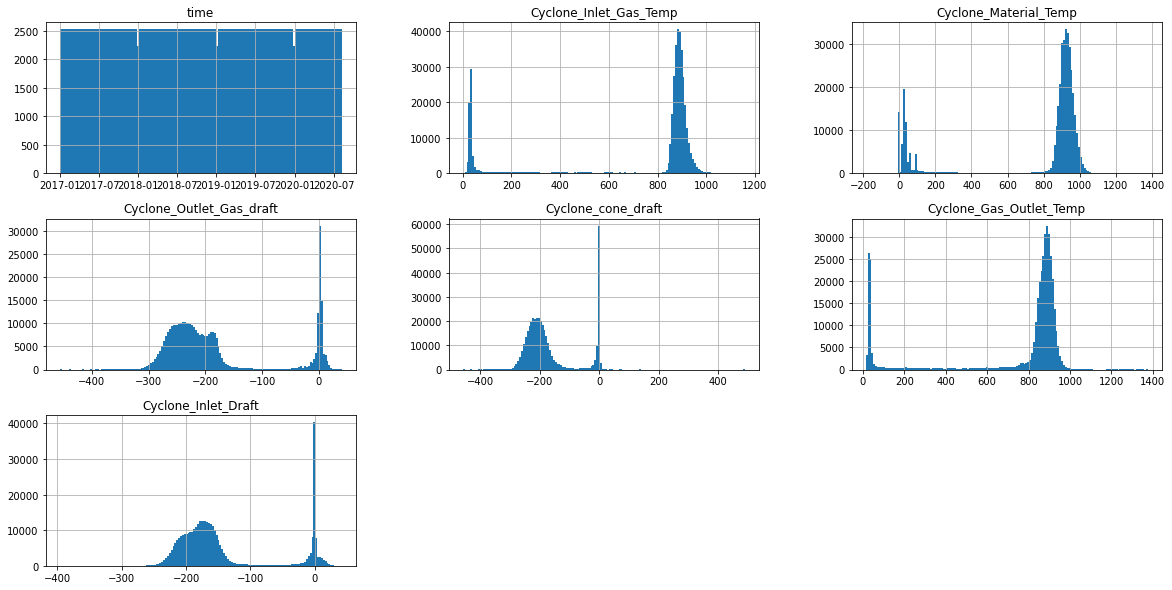

In [23]:
df.hist(bins = 150, figsize = (20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c1a281550>,
      dtype=object)

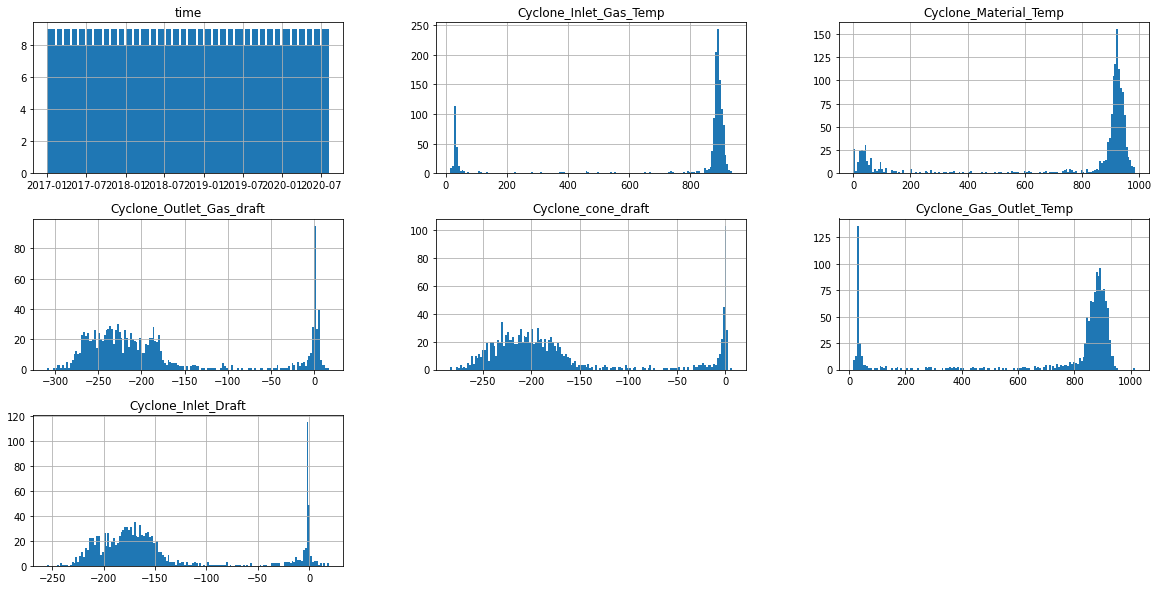

In [24]:
df1.hist(bins = 150, figsize = (20,10))

#Feature Selection

In [25]:
df1

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01,881.853993,934.871319,-180.023368,-163.740868,870.411042,-144.056111
1,2017-01-02,898.279271,942.945556,-186.367153,-180.363090,875.003576,-149.720729
2,2017-01-03,893.345972,927.172153,-185.154479,-163.163854,855.356181,-148.895729
3,2017-01-04,893.935174,927.265694,-187.595347,-161.060313,857.989896,-152.994132
4,2017-01-05,888.763750,926.464479,-188.448507,-161.894722,858.314201,-155.905556
...,...,...,...,...,...,...,...
1310,2020-08-03,883.574410,893.076458,-241.310486,-212.520590,881.129722,-189.252813
1311,2020-08-04,888.390937,906.539355,-233.734618,-211.970799,885.054444,-182.459618
1312,2020-08-05,892.585972,910.440451,-231.381250,-203.936875,891.515278,-181.235868
1313,2020-08-06,894.407535,910.064375,-230.577292,-204.826458,896.808993,-180.600868


In [42]:
feature1=df1[['time','Cyclone_Inlet_Gas_Temp','Cyclone_Material_Temp','Cyclone_Gas_Outlet_Temp']]

In [43]:
feature2=df1[['time','Cyclone_Outlet_Gas_draft','Cyclone_cone_draft','Cyclone_Inlet_Draft']]

# Model Building Using k-nearest neighbors algorithm

### Feature 1

In [64]:
#import anomaly detection module
from pycaret.anomaly import *
#intialize the setup according to Features of data set
exp_ano = setup(feature1)

,Description,Value
0,session_id,7384
1,Original Data,"(1315, 4)"
2,Missing Values,False
3,Numeric Features,3
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1315, 26)"
9,CPU Jobs,-1


In [65]:
## creating a knn model
knn1 = create_model('knn')

In [66]:
result_f1_knn = assign_model(knn1)

In [67]:
plot_model(knn1)

In [68]:
result_f1_knn

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Gas_Outlet_Temp,Anomaly,Anomaly_Score
0,2017-01-01,881.853993,934.871319,870.411042,0,6.197457
1,2017-01-02,898.279271,942.945556,875.003576,0,6.619337
2,2017-01-03,893.345972,927.172153,855.356181,0,5.678674
3,2017-01-04,893.935174,927.265694,857.989896,0,5.430562
4,2017-01-05,888.763750,926.464479,858.314201,0,5.166674
...,...,...,...,...,...,...
1310,2020-08-03,883.574410,893.076458,881.129722,0,6.837133
1311,2020-08-04,888.390937,906.539355,885.054444,0,5.483549
1312,2020-08-05,892.585972,910.440451,891.515278,0,4.327245
1313,2020-08-06,894.407535,910.064375,896.808993,0,4.214216


### Visualizing separately each Tempreture Feature (With per day Tempreture feature values)

In [112]:
import plotly.express as px

In [114]:
fig = px.scatter(result_f1_knn, x='time', y='Cyclone_Inlet_Gas_Temp', color='Anomaly', title='Abnormality Detection- Cyclone_Inlet_Gas_Temp ')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

In [115]:
fig = px.scatter(result_f1_knn, x='time', y='Cyclone_Material_Temp', color='Anomaly', title='Abnormality Detection- Cyclone_Material_Temp ')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

In [116]:
fig = px.scatter(result_f1_knn, x='time', y='Cyclone_Gas_Outlet_Temp', color='Anomaly', title='Abnormality Detection- Cyclone_Gas_Outlet_Temp ')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

### Feature 2

In [117]:
#import anomaly detection module
from pycaret.anomaly import *
#intialize the setup according to Features of data set
exp_ano = setup(feature2)

,Description,Value
0,session_id,5311
1,Original Data,"(1315, 4)"
2,Missing Values,False
3,Numeric Features,3
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1315, 26)"
9,CPU Jobs,-1


In [119]:
## creating a knn model
knn2 = create_model('knn')

In [122]:
result_f2_knn2 = assign_model(knn2)

In [123]:
plot_model(knn2)

In [125]:
result_f2_knn2

,time,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Inlet_Draft,Anomaly,Anomaly_Score
0,2017-01-01,-180.023368,-163.740868,-144.056111,0,4.852675
1,2017-01-02,-186.367153,-180.363090,-149.720729,0,5.591154
2,2017-01-03,-185.154479,-163.163854,-148.895729,0,6.619769
3,2017-01-04,-187.595347,-161.060313,-152.994132,0,8.114425
4,2017-01-05,-188.448507,-161.894722,-155.905556,0,8.208461
...,...,...,...,...,...,...
1310,2020-08-03,-241.310486,-212.520590,-189.252813,0,5.935963
1311,2020-08-04,-233.734618,-211.970799,-182.459618,0,4.640385
1312,2020-08-05,-231.381250,-203.936875,-181.235868,0,4.931375
1313,2020-08-06,-230.577292,-204.826458,-180.600868,0,5.472498


### Visualizing separately each Pressure Feature (With per day pressure feature values)

In [126]:
import plotly.express as px

In [127]:
fig = px.scatter(result_f2_knn2, x='time', y='Cyclone_Outlet_Gas_draft', color='Anomaly', title='Abnormality Detection- Cyclone_Outlet_Gas_draft')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

In [128]:
fig = px.scatter(result_f2_knn2, x='time', y='Cyclone_cone_draft', color='Anomaly', title='Abnormality Detection- Cyclone_cone_draft')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

In [130]:
fig = px.scatter(result_f2_knn2, x='time', y='Cyclone_Inlet_Draft', color='Anomaly', title='Abnormality Detection- Cyclone_Inlet_Draft')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()